<a href="https://colab.research.google.com/github/gtkim77/analysis/blob/problems/4.24_Seebeck%20coefficient%20of%20Pt%20and%20other%20metals_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-3.86150504e-09  1.38264097e-05 -3.02084903e-02  2.85553568e+00]
-558.103
-1331.457


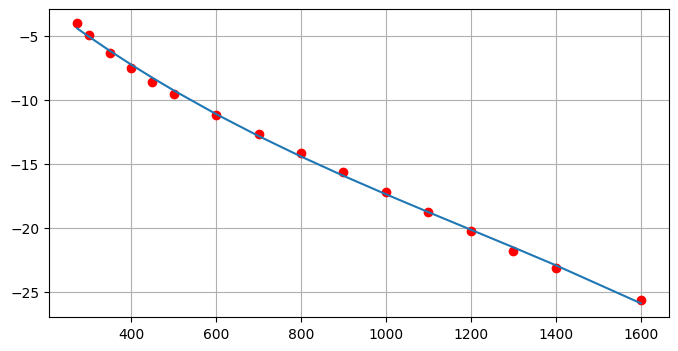

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate


def func(X, a, b, c, d):
  return a * (X ** 3) + b * (X ** 2) + c * X + d

T = np.array([273, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1600])
S = np.array([-4.04, -4.92, -6.33, -7.53, -8.59, -9.53, -11.22, -12.71, -14.14, -15.66, -17.21, -18.77, -20.29, -21.78, -23.18, -25.67])

popt, pcov = curve_fit(func, T, S, method="lm")
print(popt)

spt100 = integrate.quad(lambda x: func(x, *popt), 273, 373)
spt200 = integrate.quad(lambda x: func(x, *popt), 273, 473)

print('%.3f' % spt100[0])
print('%.3f' % spt200[0])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(T, S, 'ro')
ax.plot(T, func(T, *popt), label='fitting')
ax.grid(True)
plt.show()

<ipython-input-2-6a6cf84df71d>:13: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_Cu, pcov_Cu = curve_fit(func_linear, T, S_Cu, method="lm")
<ipython-input-2-6a6cf84df71d>:14: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_Au, pcov_Au = curve_fit(func_linear, T, S_Au, method="lm")


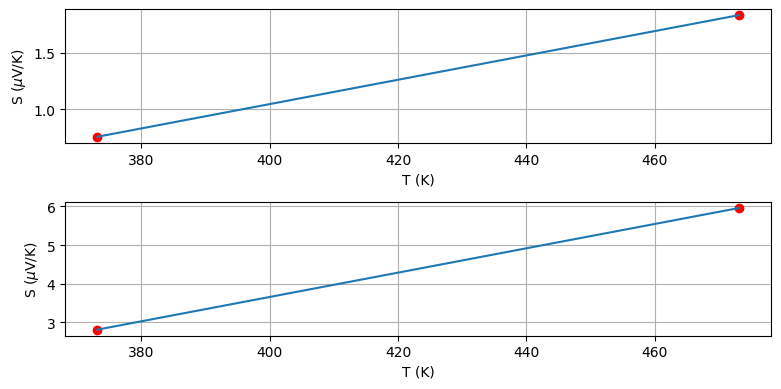

Seebeck Coefficient of Cu at T = 27C is -0.023 μV/K
Seebeck Coefficient of Au at T = 27C is 0.505 μV/K


In [2]:
# https://pythonforundergradengineers.com/unicode-characters-in-python.html

from scipy.optimize import curve_fit

T = np.array([100, 200]) + 273.16
S_Cu = np.array([0.76, 1.83])
S_Au = np.array([2.81, 5.96])

def func_linear(X, a, b):
  return a * X + b


popt_Cu, pcov_Cu = curve_fit(func_linear, T, S_Cu, method="lm")
popt_Au, pcov_Au = curve_fit(func_linear, T, S_Au, method="lm")



fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(T, S_Cu, 'ro')
ax1.plot(T, func_linear(T, *popt_Cu), label='fitting')
ax1.set_xlabel('T (K)')
ax1.set_ylabel('S ($\mu$V/K)')
ax1.grid(True)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(T, S_Au, 'ro')
ax2.plot(T, func_linear(T, *popt_Au), label='fitting')
ax2.set_xlabel('T (K)')
ax2.set_ylabel('S ($\mu$V/K)')
ax2.grid(True)

plt.tight_layout()
plt.show()


print(f"Seebeck Coefficient of Cu at T = 27C is %.3f \u03BCV/K" % (func_linear(np.array([300]), *popt_Cu)[0]))
print(f"Seebeck Coefficient of Au at T = 27C is %.3f \u03BCV/K" % (func_linear(np.array([300]), *popt_Au)[0]))